## IntroDuction
In this project our goal is to build a ml model that will predict the amount a perosn is willing to pay in dollars given some attributes.We will first build a regularized linear model and then will use ann.
<ul><b>Variables In the Data </b></ul>
<li>Name</li>
<li>E-mail</li>
<li>Country:</li>
<li>Gender</li>
<li>Age</li>
<li>Annual Salary</li>
<li>Net worth</li>
<li>Credit card Debt</li>
<li>Amount</li>
We have to predict the last one i.e amount.

### Contents
1. [Required libraries](#1)
2. [Loading Data](#2)
3. [Cleaning Data](#3)
4. [Variable Exploration](#4)
5. [Data Preprocessing](#5)

    5.1. [ Lasso model](#5.1)
    
    5.2. [Ann](#5.2)
    
6. [model Building](#6)
7. [Predictions](#7)

### Importing Libraries<a id='1'></a>

In [56]:
#for loading and manipulating data
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mat

#for prerocessing data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#for machine learning models
from sklearn.linear_model import Lasso

#for evaluation purposes
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import r2_score

#for neural nets
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

#for warnings
import warnings

In [49]:
#for generating pseudo random number
np.random.seed(1)
tf.random.set_seed(1)
#For convertng all input to float64 when working with tensorflow
tf.keras.backend.set_floatx("float64")

#for supressing warnings
warnings.filterwarnings("ignore")

### Loading Data<a id='2'></a>

In [3]:
data=pd.read_csv("Car_Purchasing_Data.csv",encoding='cp1252')

In [4]:
data.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [5]:
data.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### Cleaning Data <a id='3'></a>

In [6]:
def duplicates(data):
    if data.duplicated().any():
        print("Duplicate Rows exist in data")
    else:
        print(f"Data contain no duplicates")
duplicates(data)

Data contain no duplicates


In [7]:
print(f"We have {data.shape[0]} rows and {data.shape[1]} columns ")

We have 500 rows and 9 columns 


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
#for exploration purposes
copy=data.rename(columns={'Customer Name':'Name',
                          'Annual Salary':'Salary',
                          'Credit Card Debt':'Debt',
                          'Car Purchase Amount':'Amount',
                          'Customer e-mail':'email',
                         'Net Worth':'Net_Worth'})
numeric=copy.select_dtypes([np.int64,np.float64])
numeric=numeric.drop(columns=['Gender'],axis=1)

In [10]:
numeric.describe()

,Age,Salary,Debt,Net_Worth,Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


###  Variable Exploration <a id='4'></a>
In this part we will explore the distribution of variables of data and the relationshiphs between them.We will also look for potential outlier in the data .

In [11]:
plt.style.use("bmh")
mat.rcParams['lines.linewidth']=2
mat.rcParams['axes.labelsize']=15



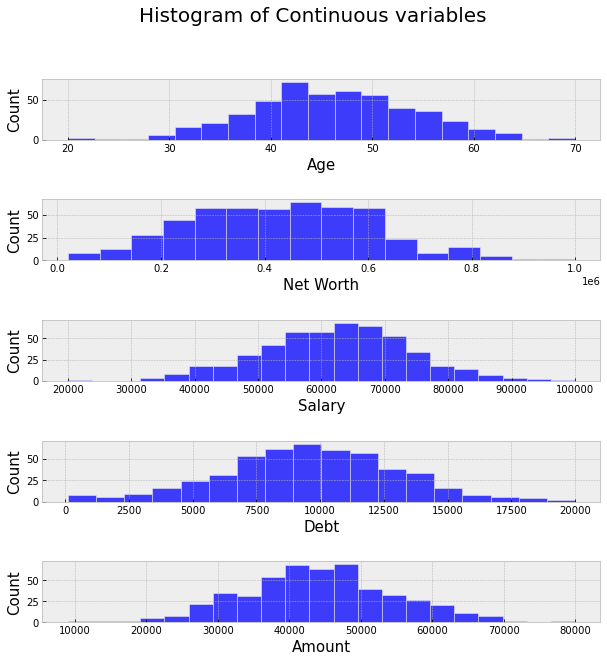

In [12]:
fig=plt.figure(figsize=(10,10))
grid=plt.GridSpec(5,5,wspace=0.98,hspace=0.98)
ax1=fig.add_subplot(grid[0,:])
ax2=fig.add_subplot(grid[1,:])
ax3=fig.add_subplot(grid[2,:])
ax4=fig.add_subplot(grid[3,:])
ax5=fig.add_subplot(grid[4,:])
fig.suptitle("Histogram of Continuous variables",fontsize=20)

age_plot=sns.histplot(x=copy['Age'],ax=ax1)
age_plot.set(xlabel='Age')

net_plot=sns.histplot(x=copy['Net_Worth'],ax=ax2)
net_plot.set(xlabel='Net Worth')

salary_plot=sns.histplot(x=copy['Salary'],ax=ax3)
salary_plot.set(xlabel='Salary')

debt_plot=sns.histplot(x=copy['Debt'],ax=ax4)
debt_plot.set(xlabel='Debt')

amount_plot=sns.histplot(x=copy['Amount'],ax=ax5)
amount_plot.set(xlabel='Amount')


plt.show()

<ul><b>Some Conclusions from above Plots</b></ul>
<li>Most of the variable is nearly normally distributed. </li>
<li>"Net Worth" has a plateau between ${0.2*10^6}$ to ${0.6*10^6}$</li>
<li>Most of the people in the data are in their working age i.e 30 to 60.</li>
<li>Their exist some outlier in the data.More on this later in the notebook</li>


<AxesSubplot:>

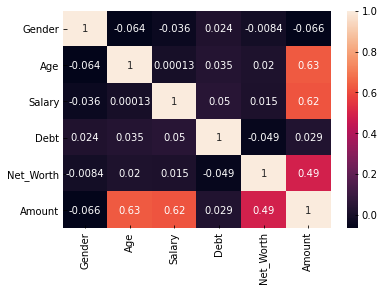

In [13]:
corr=copy.corr()
sns.heatmap(corr,annot=True)

So Age and salary are directly correlated with Amount .And that's make sense as most of the people in working age group  are willing  to pay more .Similarly ,the more your salary is the more amount you can spend on cars.By default "corr"  excludes any categorical variable that's why name,country and email are excluded.

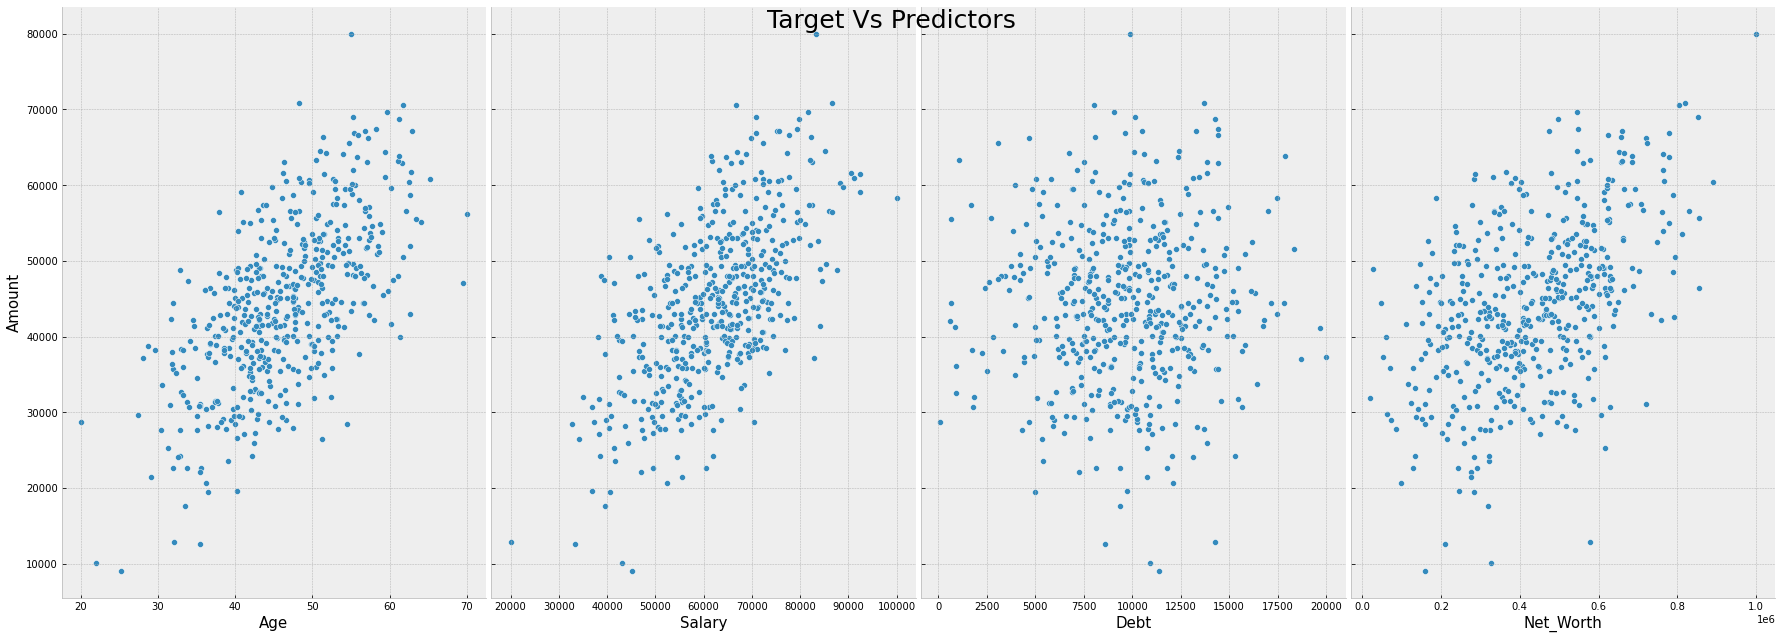

In [14]:
g=sns.pairplot(x_vars=numeric.columns[:-1],y_vars=numeric.columns[-1],data=copy,height=9,aspect=0.7)
g.fig.suptitle("Target Vs Predictors",fontsize=25);


The above plot is between "Amount" and various continuous predictors that we have in our data set .Now from the above it is clear that their exist a linear relation between our target variable and "Age","Salary", and "Net Worth".However,debt doesn't have any clear relationship between "Amount". 

(0.0, 1.0, 0.0, 1.0)

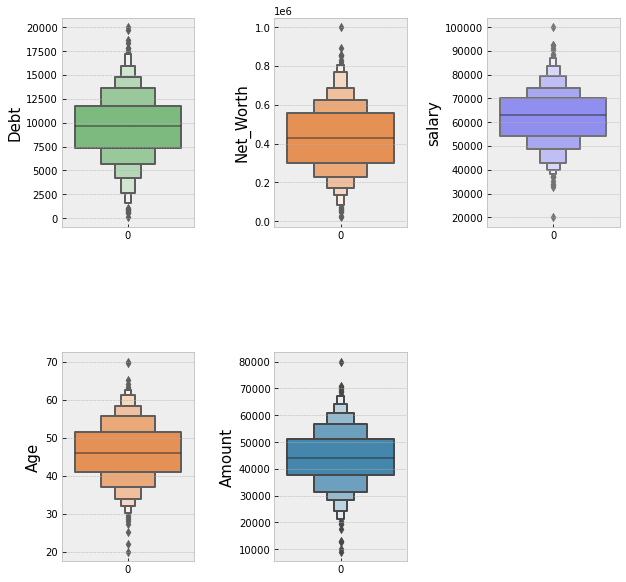

In [15]:
fig,ax=plt.subplots(2,3,gridspec_kw={"wspace":0.6,"hspace":0.6},figsize=(10,10))

debt=sns.boxenplot(data=copy['Debt'],ax=ax[0,0],palette='Greens')
debt.set(ylabel='Debt')
net_worth=sns.boxenplot(data=copy['Net_Worth'],ax=ax[0,1],palette='Oranges')
net_worth.set(ylabel="Net_Worth")
salary=sns.boxenplot(data=copy['Salary'],ax=ax[0,2],palette='cool')
salary.set(ylabel='salary')
age=sns.boxenplot(data=copy['Age'],ax=ax[1,0],palette='Oranges')
age.set(ylabel='Age')
amount=sns.boxenplot(data=copy['Amount'],ax=ax[1,1])
amount.set(ylabel='Amount')
ax[1,2].get_xaxis().set_ticks([])
ax[1,2].get_yaxis().set_ticks([])
ax[1,2].axis("off")

In [46]:
#Amount
Q1_amount,Q2_amount,Q3_amount=copy['Amount'].quantile([0.25,0.5,0.75])
IQr=Q3_amount-Q1_amount
Upper_bound_amount=Q3_amount+2*IQr
print(Upper_bound_amount)

#Salary
Q1_salary,Q2_salary,Q3_salary=copy['Salary'].quantile([0.25,0.5,0.75])
IQr=Q3_salary-Q1_salary
Upper_bound_salary=Q3_salary+2*IQr
Lower_bound_salary=Q1_salary-2*IQr
print(Lower_bound_salary)


78437.04344
22978.93505


In this plot we can see that "Net Worth" has some values that are way far then the others and in Amount 80k seems to be a very large amount .Most people spends in the range 20k to 65k .Also,in salary we can see that 20k is little less than   Q1-2*IQr. 

### Data Preprocessing<a id='5'></a>
As our data contain some categorical Varible and numericla data .Any machine learning algorithm expects the data to be in numeric form so we will encode the data and then  scale the numeric variable as they have different scale .In this part,we also remove the outliers detected in the previous plot.

In [17]:
#removing the outliers
copy=copy[copy['Net_Worth']!=1000000]
copy=copy[copy['Amount']!=80000]
copy=copy[(copy['Salary']!=20000) | (copy['Salary']!=100000)]


In [18]:
copy=shuffle(copy)
X=copy.drop(columns=['Name','email','Country','Amount'],axis=1)
Y=copy['Amount']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05)

#####  Preprocessing for Lasso model<a id='5.1'></a>
For Lasso model i am making a pieline that will first scales the continuous variable of  data with zero mean and 1 std and then fits Lasso model.

In [20]:
print(f"Shape of training_data:{X_train.shape}\nShape of Testing_data:{X_test.shape}")

Shape of training_data:(474, 5)
Shape of Testing_data:(25, 5)


In [21]:
numeric_columns=['Age','Salary','Debt','Net_Worth']
#for scaling target 
scaler_y=StandardScaler()
#for scaling Inputs
t=[('numeric',StandardScaler(),numeric_columns)]
col_transform=ColumnTransformer(transformers=t,remainder='passthrough')

In [22]:
Y_train_scaled=scaler_y.fit_transform(np.array(Y_train).reshape(-1,1))
Y_test_scaled=scaler_y.transform(np.array(Y_test).reshape(-1,1))

#### Preprocessing for for Neural Nets <a id='5.2'></a>
In this part we will use minmax scaler to transform our X and Y values and then use column transformer to scale every continuous variable .Gender Column will remain as it is.

In [23]:
minmax=MinMaxScaler()
Y_train_minmax=minmax.fit_transform(np.array(Y_train).reshape(-1,1))
Y_test_minmax=minmax.transform(np.array(Y_test).reshape(-1,1))

In [24]:
n=[('numeric',MinMaxScaler(),numeric_columns)]
col_transform2=ColumnTransformer(transformers=n,remainder='passthrough')

In [25]:
X_train_scaled=col_transform2.fit_transform(X_train)
X_test_scaled=col_transform2.transform(X_test)
new_X_train=pd.DataFrame(X_train_scaled,columns=['Age','Salary','Debt','Net_Worth','Gender'])
new_X_test=pd.DataFrame(X_test_scaled,columns=['Age','Salary','Debt','Net_Worth','Gender'])

### Model Building<a id ='6'></a>
In this part we will build our ml model and evaluate to see which machine learning works best . First we will fit a regularized regression.Since this is a small dataset their are chances that this a very complex model might overfit the training data and fail to generalise the pattern.Here,We are using Lasso Regression .

<b>Lasso Regression</b>
Since this data is very small and when we split it into training and testing dataset then it makes it  more small.There are chances of overfitting if we do not use any regularized model.Complex models with many parameter will capture the noise of data also which makes our model un-usefull.In Lasso model we penalize the absolute value of coefficient .

In [26]:
lr=Lasso(alpha=0.4)
pipe=Pipeline(steps=[('col',col_transform),('linear',lr)])

In [27]:
cv=KFold(n_splits=10,shuffle=True,random_state=1)
scores_lasso=cross_val_score(pipe,X_train,Y_train_scaled,cv=cv,scoring='neg_mean_squared_error')
print(f"mean cross validation score for lasso model:{np.absolute(scores_lasso).mean()} with std:{np.absolute(scores_lasso).std()}")

mean cross validation score for lasso model:0.47767533763029035 with std:0.05275452721782208


In [28]:
pipe.fit(X_train,Y_train_scaled)

Pipeline(steps=[('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['Age', 'Salary', 'Debt',
                                                   'Net_Worth'])])),
                ('linear', Lasso(alpha=0.4))])

In [29]:
pd.DataFrame({"values":lr.coef_.ravel(),"columns":['Gender','Age','Salary','Debt','Net Worth']})

,values,columns
0,0.235312,Gender
1,0.216910,Age
2,0.000000,Salary
3,0.073992,Debt
4,-0.000000,Net Worth


Now we can see that according to this model the amount a person is willing to pay depends upon Age,Gender and Debt .

In [30]:
prediction_train=scaler_y.inverse_transform(pipe.predict(X_train))

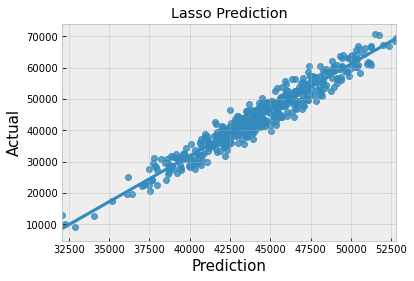

In [31]:
fig,ax=plt.subplots()
h=sns.regplot(y=Y_train,x=prediction_train)
h.set(ylabel="Actual",xlabel='Prediction',title='Lasso Prediction');

Here, We can see that the plot between actual values and prediction linear .Also the error for low values is high and slowly as we move to higher values the error decreases.Now,we will try another more sophisticated machine learning model i.e neural nets .

<b>Neural Network</b>:Now We will be using neural network it is a more complex algorithm then previous one so we have to regularize this otherwise it will fail to genralize.In our model we will be using two layers the first one is Dense layer with 64 units and the second one has 1 unit.Now in the first layer i have use l2 regularizer for the weights which means this model will use second order term of weights in cost function.The cost function is mean_squared_error 

In [32]:
model=Sequential([
Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=1),kernel_regularizer=tf.keras.regularizers.l2(0.03)),
Dense(1,activation='relu')])
op=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=op,loss='mean_squared_error',metrics=['mean_squared_error'])

In [33]:
history=model.fit(new_X_train,Y_train_minmax,epochs=20,validation_split=0.3)

Epoch 1/20
11/11 [==============================] - 0s 15ms/step - loss: 3.5281 - mean_squared_error: 0.0405 - val_loss: 2.9933 - val_mean_squared_error: 0.0287
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 2.6375 - mean_squared_error: 0.0139 - val_loss: 2.2121 - val_mean_squared_error: 0.0112
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 1.9442 - mean_squared_error: 0.0077 - val_loss: 1.6200 - val_mean_squared_error: 0.0068
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 1.4202 - mean_squared_error: 0.0051 - val_loss: 1.1791 - val_mean_squared_error: 0.0043
Epoch 5/20
11/11 [==============================] - 0s 4ms/step - loss: 1.0331 - mean_squared_error: 0.0040 - val_loss: 0.8552 - val_mean_squared_error: 0.0026
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.7490 - mean_squared_error: 0.0030 - val_loss: 0.6189 - val_mean_squared_error: 0.0016
Epoch 7/20
11/11 [=====================

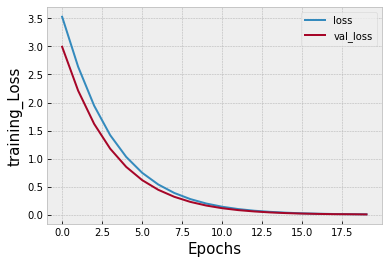

In [34]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("training_Loss")
plt.legend();

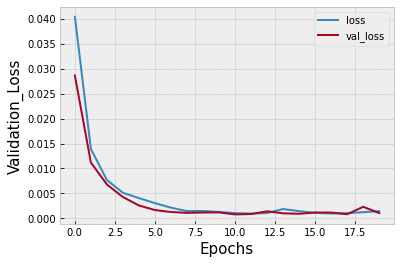

In [35]:
plt.plot(history.history['mean_squared_error'],label='loss')
plt.plot(history.history['val_mean_squared_error'],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Validation_Loss")
plt.legend();


These curves seem to perform good on validation and training data .Now I will use KFold cross_validation to validate whether our model performs better then lasso or not 

In [36]:
cvscores=[]
kf=KFold(n_splits=10,shuffle=True,random_state=1)
for train,test in kf.split(new_X_train,Y_train_minmax):
    model.fit(new_X_train.loc[train,:],Y_train_minmax[train])
    scores=model.evaluate(new_X_train.loc[test,:],Y_train_minmax[test])
    cvscores.append(scores[1]*100)
np_score=np.array(cvscores)
print(f"\n mean  cross validation score for ann is {np_score.mean()} with std:{np_score.std()}")

2/2 [==============================] - 0s 0s/step - loss: 0.0031 - mean_squared_error: 3.0484e-04

 mean  cross validation score for ann is 0.166592215992361 with std:0.17182720313793476


So the mean cross validation score is lower then lasso regression so we will use ann  for prediction of test data .

### Predictions <a id='7'></a>

In [37]:
prediction=minmax.inverse_transform(model.predict(new_X_train))
actual=minmax.inverse_transform(Y_train_minmax)
predict_data=pd.DataFrame({"Actual":actual.ravel(),"Prediction":prediction.ravel()})
predict_data

,Actual,Prediction
0,35716.31133,36416.452493
1,57441.44414,56538.038928
2,41567.47033,41943.552245
3,41673.44617,41573.455421
4,53655.53859,52533.059843
...,...,...
469,49392.88970,48793.867673
470,39888.59789,40571.012375
471,41352.47071,41716.658122
472,45208.42539,45133.944923


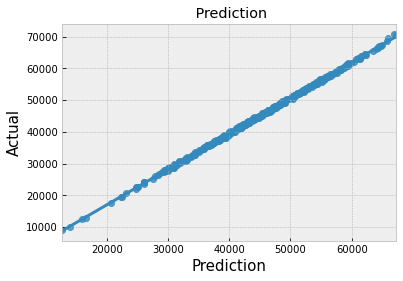

In [38]:
fig,ax=plt.subplots()
h=sns.regplot(y=actual,x=prediction)
h.set(ylabel="Actual",xlabel='Prediction',title=' Prediction');

So ,Our model is better at predicting higher values but not so good at predicting values lower then 25000.

In [39]:
prediction_test=minmax.inverse_transform(model.predict(new_X_test))
actual_test=minmax.inverse_transform(Y_test_minmax)
predict_test_data=pd.DataFrame({"Actual":actual.ravel(),"Prediction":prediction.ravel()})
predict_test_data

,Actual,Prediction
0,35716.31133,36416.452493
1,57441.44414,56538.038928
2,41567.47033,41943.552245
3,41673.44617,41573.455421
4,53655.53859,52533.059843
...,...,...
469,49392.88970,48793.867673
470,39888.59789,40571.012375
471,41352.47071,41716.658122
472,45208.42539,45133.944923


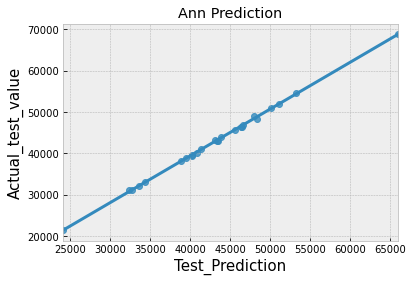

In [40]:
fig,ax=plt.subplots()
h=sns.regplot(y=actual_test,x=prediction_test)
h.set(ylabel="Actual_test_value",xlabel='Test_Prediction',title='Ann Prediction');


In [55]:
r2_score(actual_test,prediction_test)

0.9855265960103786

So we can see that our ann is working very well in prdicting the test data.However ,ann are nor particularly usefull for the task of explainbility ,like which features are important or not for that we can use simple models like linear regression .
<h1><center>The End</center></h1>